In [16]:
#A chatbot is a software application used to conduct an on-line chat conversion via text

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import random

In [18]:
architecture_of_chatbot={"intents": [
        {"tag": "welcome",
         "inputs": ["Hi there", "How are you", "How do you do?","Hey","What's up?", "Hello", "What's up?"],
         "outputs": ["Hello", "Hello My friend ,How may I help you?", "Hi there, Do you need any help?"],
         "context": [""]
        },
        {"tag": "goodbye",
         "inputs": ["Bye", "Goodbye", "Nice chatting to you, bye", "Till next time"],
         "outputs": ["See you!", "Have a nice day", "Bye! Come back again soon."],
         "context": [""]
        },
        {"tag": "chatbot",
         "inputs": ["What is a chatbot?"],
         "outputs": ["A chatbot is a computer program designed to simulate human conversation through text or voice interactions. It uses natural language processing (NLP) and machine learning algorithms to understand and respond to user queries."],
         "context": [""]
        },
        {"tag": "work",
         "inputs": ["How does a chatbot work?"],
         "outputs": ["A chatbot works by processing user input (text or voice) using natural language processing techniques. It then uses machine learning algorithms to analyze the input and generate a relevant response based on its training data and algorithms."],
         "context": [""]
        },
        {"tag": "ML",
         "inputs": ["What is machine learning in the context of chatbots?"],
         "outputs": ["Machine learning is a subset of artificial intelligence that enables chatbots to learn from data and improve their performance over time. It allows them to recognize patterns, understand context, and generate more accurate responses to user queries."],
         "context": [""]
        },
        {"tag": "NLP",
         "inputs": ["What is NLP in a chatbot?"],
         "outputs": ["NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language. In a chatbot, NLP enables the bot to understand and interpret user queries, allowing it to generate relevant responses."],
         "context": [""]
        },
        {"tag": "learn",
         "inputs": ["How does a chatbot learn from data?"],
         "outputs": ["A chatbot learns from data by training on a large dataset of conversations. It uses machine learning algorithms, such as deep learning models like recurrent neural networks (RNNs) or transformers, to analyze patterns in the data and learn how to generate appropriate responses."],
         "context": [""]
        }
    ]
 }

In [19]:
tags=[]
inputs=[]
outputs={}
for intent in architecture_of_chatbot['intents']:
    outputs[intent['tag']]=intent['outputs']
    for lines in intent['inputs']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [20]:
data=pd.DataFrame({'inputs':inputs,'tags':tags})

In [21]:
data

,inputs,tags
0,Hi there,welcome
1,How are you,welcome
2,How do you do?,welcome
3,Hey,welcome
4,What's up?,welcome
5,Hello,welcome
6,What's up?,welcome
7,Bye,goodbye
8,Goodbye,goodbye
9,"Nice chatting to you, bye",goodbye


In [22]:
data=data.sample(frac=1)

In [23]:
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data

,inputs,tags
14,what is nlp in a chatbot,NLP
9,nice chatting to you bye,goodbye
8,goodbye,goodbye
12,how does a chatbot work,work
7,bye,goodbye
3,hey,welcome
11,what is a chatbot,chatbot
10,till next time,goodbye
4,whats up,welcome
1,how are you,welcome


In [24]:
tokenzier=Tokenizer(num_words=2000)
tokenzier.fit_on_texts(data['inputs'])
train=tokenzier.texts_to_sequences(data['inputs'])
x_train=pad_sequences(train)
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [25]:
input_shape=x_train.shape[1]
input_shape

9

In [26]:
vocabulary=len(tokenzier.word_index)
print("number of unique words: ",vocabulary)
output_length=le.classes_.shape[0]
print("output length: ",output_length)

number of unique words:  35
output length:  7


In [27]:
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation='softmax')(x)
model=Model(i,x)
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [28]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.9475 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 1.9437 - accuracy: 0.1250
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 1.9398 - accuracy: 0.1875
Epoch 4/200
1/1 [==============================] - 0s 23ms/step - loss: 1.9360 - accuracy: 0.4375
Epoch 5/200
1/1 [==============================] - 0s 23ms/step - loss: 1.9321 - accuracy: 0.4375
Epoch 6/200
1/1 [==============================] - 0s 19ms/step - loss: 1.9281 - accuracy: 0.4375
Epoch 7/200
1/1 [==============================] - 0s 26ms/step - loss: 1.9240 - accuracy: 0.4375
Epoch 8/200
1/1 [==============================] - 0s 23ms/step - loss: 1.9198 - accuracy: 0.4375
Epoch 9/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9154 - accuracy: 0.4375
Epoch 10/200
1/1 [==============================] - 0s 23ms/step - loss: 1.9109 - accuracy: 0.4375
Epoch 11/200
1/1 

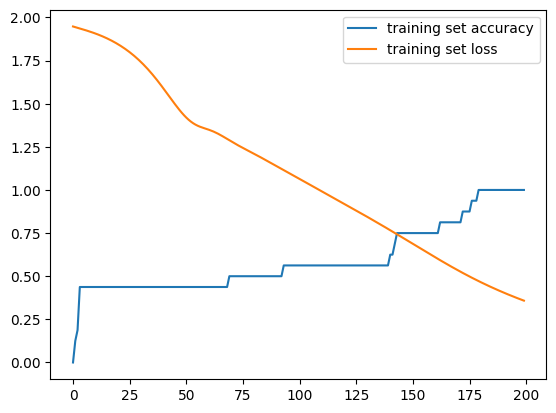

In [29]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [32]:
while True:
    texts_p=[]
    prediction_input=input('You: ')

    prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input=''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input=tokenzier.texts_to_sequences(texts_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_shape)

    output=model.predict(prediction_input)
    output=output.argmax()

    response_tag=le.inverse_transform([output])[0]
    print("robot: ",random.choice(outputs[response_tag]))
    if response_tag=='goodbye':
        break

You: hi
1/1 [==============================] - 0s 28ms/step
robot:  Hello
You: what is a chatbot
1/1 [==============================] - 0s 40ms/step
robot:  A chatbot is a computer program designed to simulate human conversation through text or voice interactions. It uses natural language processing (NLP) and machine learning algorithms to understand and respond to user queries.
You: What is NLP in a chatbot
1/1 [==============================] - 0s 24ms/step
robot:  NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language. In a chatbot, NLP enables the bot to understand and interpret user queries, allowing it to generate relevant responses.
You: goodbye
1/1 [==============================] - 0s 25ms/step
robot:  See you!
